
<h1 style="text-align:center; font-family:Times New Roman">CP321 - Sports Car Analysis Project</h1>

<h2 style="text-align:center; font-family:Times New Roman; font-size:1.5em">Nishant Tewari & Dharmik Patel</h2>

<h2 style="text-align:center; font-family:Times New Roman; font-size:1.5em">190684430 & 180343800</h2>

<h1 style="text-align:left; font-family:Times New Roman">Introduction</h1>

<span style="font-family: Times New Roman;">The dataset used for this project can be retrieved from [here](https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset?resource=download)</span>

<span style="font-family: Times New Roman;">The data contains information on various Sports cars across multiple car manufactures such as 
- Make & Model of the car 
- Year of Production 
- Engine Size (L)
- Horsepower (HP)
- Torque (lb-ft)
- 0 - 60 MPH time(seconds)
- Price (USD)
</span> 

<span style="font-family: Times New Roman;">The dataset has 38 unique car manufactures ranging from brands we commonly see on the roads all the way to more exotic rides that are not common at all.</span>
</br>
<span style="font-family: Times New Roman;">The lowest price car on the dataset is the 2021 Chevrolet Camaro priced at $25,000 USD</span>
</br>
<span style="font-family: Times New Roman;">The highest price car on the dataset is the 2022 Bugatti Chiron Super Sport 300+ priced at $5.2 million USD</span>



<h1 style="text-align:left; font-family:Times New Roman">Motivation</h1>

<span style="font-family: Times New Roman;">As kids, we all had dreams and aspirations, and for many of us, owning a sports car was one of them. The mere sight of a sleek, powerful vehicle would leave us in awe and wonder, imagining ourselves behind the wheel. After the hard work you devoted in the past couple of years, it is finally time to buy you very own sports car. However with many possible makes and models to choose from, your left to wonder which one is the perfect car for you?</span>

<h1 style="text-align:left; font-family:Times New Roman">Budget</h1>

<span style="font-family: Times New Roman;">After years of hard work and determination, Silvia finally decided it's her time to purchase a sports car for herself. The Autohaven dealership offers variety of sports cars ranging from $25k - $5.2 million dollars. Silvia had a budget in mind and wanted to only see vehicles under $500,000</span>

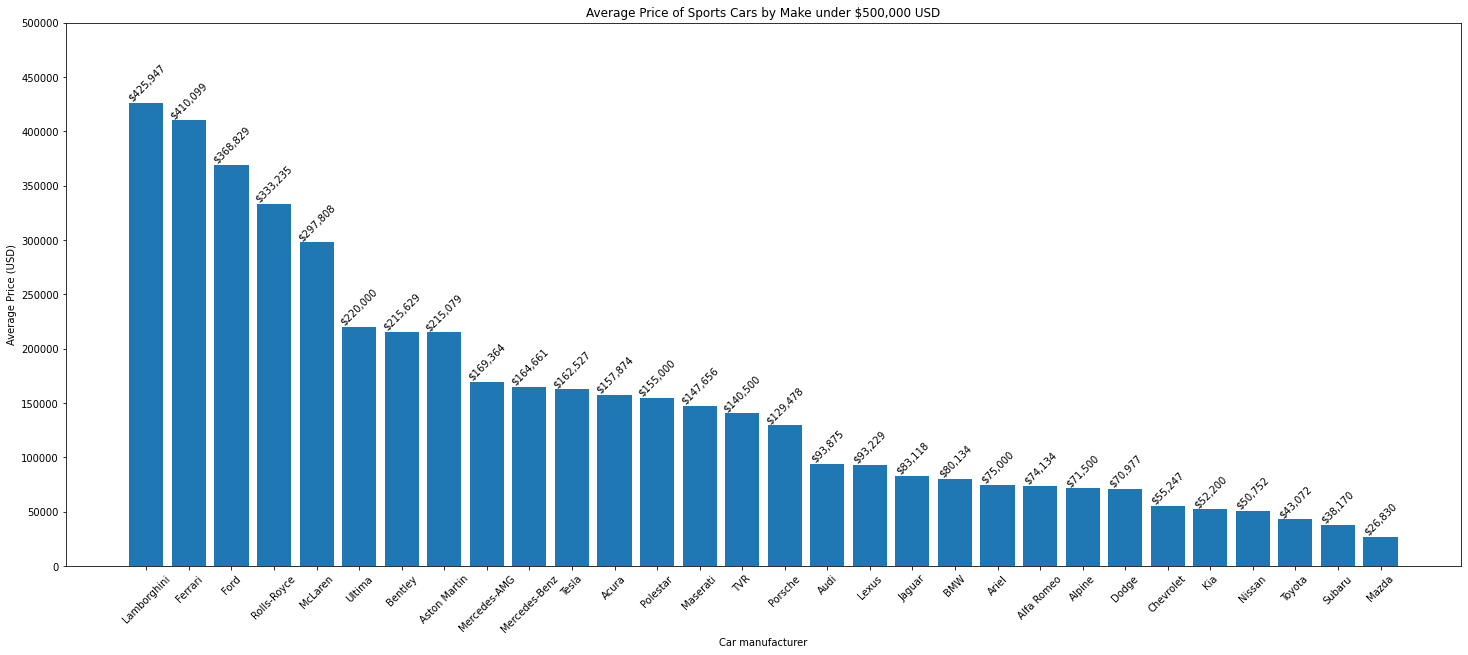

In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/sport_car_price.csv')

# fitler the price column to replace any additonal characters and change to float  
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# calculating the average price of the cars made by each brand 
avg_prices = df.groupby('Car Make')['Price (in USD)'].mean().reset_index()

# set the overall size of the graph 
plt.figure(figsize=(25, 10))

# filtering the average prices to show car brands that average below $500,000
avg_prices = avg_prices[avg_prices['Price (in USD)'] <= 500000]

# Sort the average price of sports car under $500,000 in descending order
sort_avg_price = avg_prices.sort_values(by='Price (in USD)', ascending=False)

# Plot a bar plot of the average price for each make of car
plt.bar(sort_avg_price['Car Make'], sort_avg_price['Price (in USD)'])

# Set the plot title and axis labels
plt.title('Average Price of Sports Cars by Make under $500,000 USD')
plt.xlabel('Car manufacturer')
plt.ylabel('Average Price (USD)')

# Rotate the names on the x-axis to make it easier to read 
plt.xticks(rotation=45)

# Annotate each bar with the exact average price calculated for each manufacturer
for i, v in enumerate(sort_avg_price['Price (in USD)']):
    plt.text(i, v, f'${round(v, 0):,.0f}', ha='center', va='bottom', rotation=45)

# Set the y-axis labels with an increment of $50,000 between (0 - $500k)
plt.ylim(0, 500000)
plt.yticks(np.arange(0, 500001, 50000))

# plot the graph 
plt.show()

<h1 style="text-align:left; font-family:Times New Roman">Horsepower vs Price</h1>

<span style="font-family: Times New Roman;">Silvia sparked curiousity and wanted to see the relationship between the horsepower of the vehicles and what they are valued at in USD. Autohaven dealership provided Silvia with a scatter plot to display the relationship</span>

C:\Users\nisht\AppData\Local\Temp\ipykernel_19040\1818538488.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)


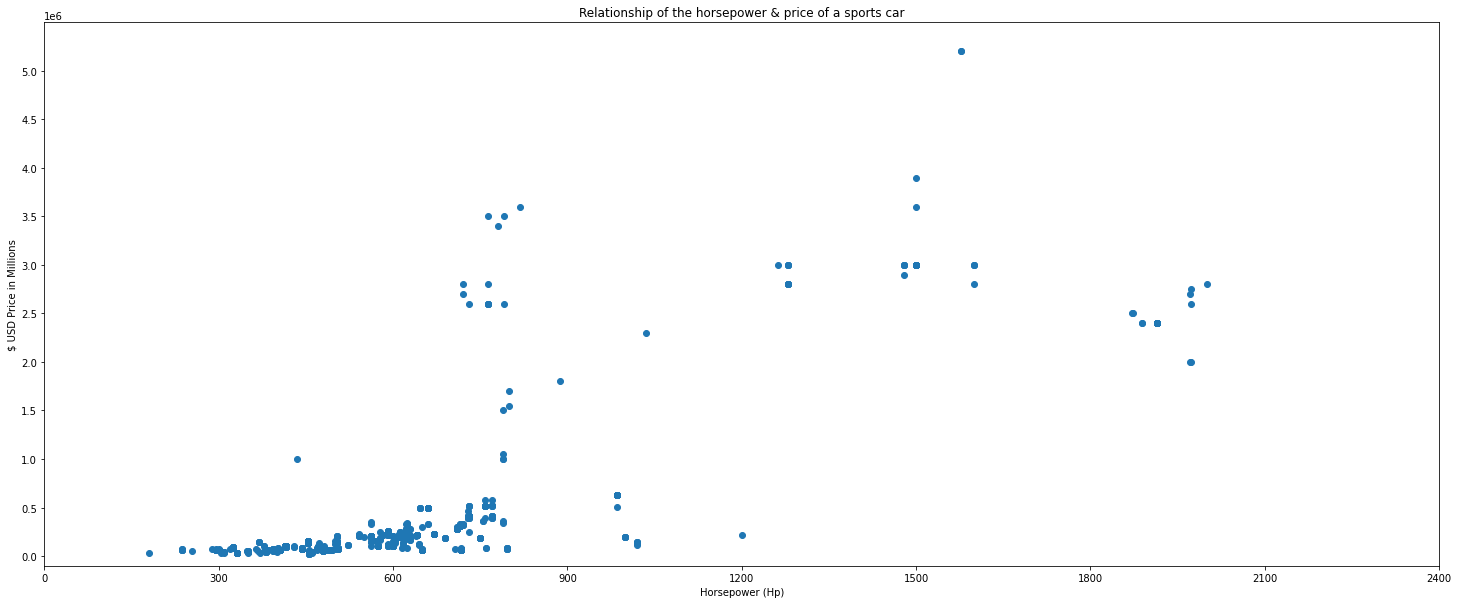

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/sport_car_price.csv')

# fitler the horsepower column to replace any additonal characters and change to float  
df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)

# fitler the price column to replace any additonal characters and change to float  
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# drop the values above at 10000 -> these numbers are unrealistic 
df = df.drop(df[df['Horsepower'] == 10000].index)

# set the overall size of the graph 
plt.figure(figsize=(25, 10))

# plot the horsepower values accordinly to their prices 
plt.scatter(df['Horsepower'], df['Price (in USD)'])

# Set the plot, title and axis labels of the graph 
plt.title('Relationship of the horsepower & price of a sports car')
plt.xlabel('Horsepower (Hp)')
plt.ylabel('$ USD Price in Millions')

# Set the x-axis labels with an increment of 300 horsepower (0 - 2500 hp)
plt.xticks(np.arange(0, 2501, 300))

# Set the y-axis labels with an increment of $500,000 between (0 - $5.5m)
plt.ylim(-100000, 5500000)
plt.yticks(np.arange(0, 5000001, 500000))

# show the graph 
plt.show()

<h1 style="text-align:left; font-family:Times New Roman">Horsepower VS Torque vs Price ($ USD) </h1>

<span style="font-family: Times New Roman;">Silvia wants to the relationship between three variables; horsepower, torque and price. Autohaven dealership provided a scatter plot of the relationship of horsepower and torque along with color coded data points related to the price</span>

C:\Users\nisht\AppData\Local\Temp\ipykernel_19040\4256658508.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)


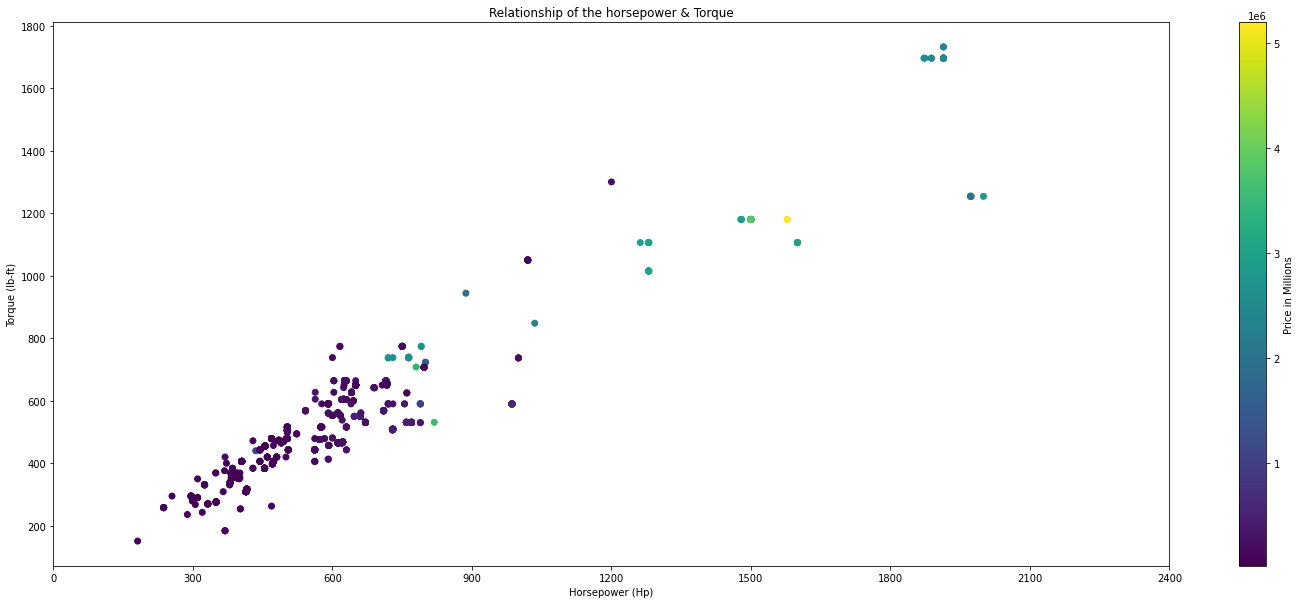

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/sport_car_price.csv')

# clean any non numeric values for the torque column 
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')

# fitler the horsepower column to replace any additonal characters and change to float  
df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)

# fitler the price column to replace any additonal characters and change to float  
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# drop the values above at 10000 -> these numbers are unrealistic 
df = df.drop(df[df['Horsepower'] == 10000].index)

# set the overall size of the graph 
plt.figure(figsize=(25, 10))

# plot the horsepower values accordinly to their torque relationship and color code it by the price of the sports car 
plt.scatter(df['Horsepower'], df['Torque (lb-ft)'], c= df['Price (in USD)'])

# Set the plot, title and axis labels of the graph 
plt.title('Relationship of the horsepower & Torque')
plt.xlabel('Horsepower (Hp)')
plt.ylabel('Torque (lb-ft)')

# Set the x-axis labels with an increment of 300 horsepower (0 - 2500 hp)
plt.xticks(np.arange(0, 2501, 300))

# Color gradient legend to show the distrubution of the scatter plots
cbar = plt.colorbar()
cbar.ax.set_ylabel('Price in Millions')

# show the graph 
plt.show()

C:\Users\nisht\AppData\Local\Temp\ipykernel_19040\1529835582.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)


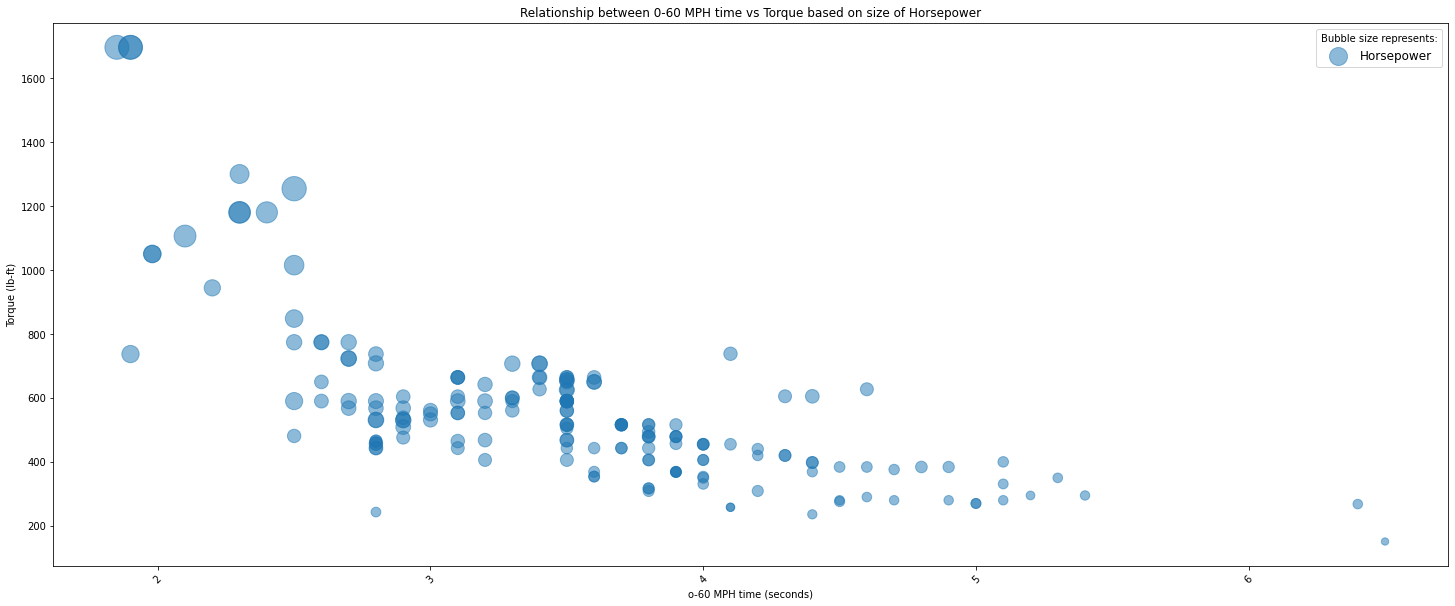

In [13]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/sport_car_price.csv')

# clean any non numeric values for the torque column 
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')

# fitler the horsepower column to replace any additonal characters and change to float  
df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)

# Clean any non numeric data values 
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')

# Drop any duplicate values to clean the bubble chart
df = df.drop_duplicates(subset=['Car Make', 'Car Model'])

# set the data columns to create bubble chart relationship
y = df['Torque (lb-ft)']
x = df['0-60 MPH Time (seconds)']
bubble =  df['Horsepower']

# set the overall size of the graph 
plt.figure(figsize=(25, 10))

# Create bubble chart
plt.scatter(x, y, s= bubble*0.3, alpha=0.5, label= 'Horsepower')

# Set the plot title and axis labels
plt.title('Relationship between 0-60 MPH time vs Torque based on size of Horsepower')
plt.xlabel('o-60 MPH time (seconds)')
plt.ylabel('Torque (lb-ft)')
# Rotate the names on the x-axis to make it easier to read 
plt.xticks(rotation=45)

# Legend to understand what the bubble size represents 
plt.legend(title='Bubble size represents:', fontsize=12)

# plot the graph 
plt.show()